In [10]:
plot_path = 'graphs/pmt_signal/'
from convolution_utils import Distribution, PlotUtil
from shower_utils import *
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import integrate

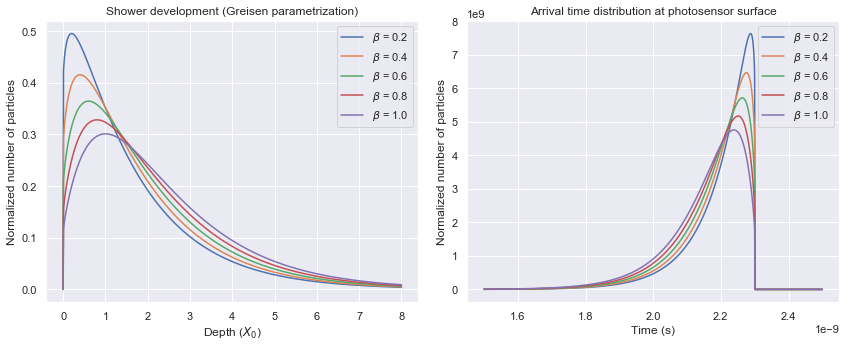

In [13]:
sns.set()
sns.set_context("notebook")
sns.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

r = range(1, 6)
legend = [r'$\beta$ = '+str(beta/5) for beta in r]
x = np.linspace(0, 8, 1000, endpoint=True)

for b in r:
    beta = b/5
    norm = integrate.quad(lambda x, beta=beta: shower_func(x,beta), 0, 8)[0]
    f = lambda x, beta=beta: shower_func(x,beta)/norm
    #print(integrate.quad(f, 0, 8)[0])
    ax1.plot(x, np.vectorize(f)(x, beta))
ax1.set_title('Shower development (Greisen parametrization)')
ax1.set_xlabel('Depth ($X_0$)')
ax1.set_ylabel('Normalized number of particles')
ax1.legend(legend)


r = range(1, 6)
legend = [r'$\beta$ = '+str(beta/list(r)[-1]) for beta in r]
t = np.linspace(1.5e-9, 2.5e-9, 1000, endpoint=True)

for b in r:
    beta = b/5
    norm = integrate.quad(lambda x, beta=beta: shower_func_t(x, beta), 1.5e-9, 2.5e-9)[0]
    #x = np.linspace(1e-9, 3e-9, 200)
    #plt.plot(x, list(map(shower_func_t, x)))
    #plt.show()
    f = lambda x, beta=beta: shower_func_t(x,beta)/norm
    #d.append(Distribution(lambda x, beta=beta: shower_func_t(x,beta)/norm, t))
    ax2.plot(t, np.vectorize(f)(t, beta))
ax2.set_title('Arrival time distribution at photosensor surface')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Normalized number of particles')
ax2.legend(legend)

fig.tight_layout()

#extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig(plot_path+'greisen_depth.png', dpi=200, bbox_inches=extent)#

#extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig(plot_path+'greisen_time.png', dpi=200, bbox_inches=extent)

fig.savefig(plot_path+'greisen.png', dpi=200)